In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 출력 옵션 변경
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 100)

In [3]:
# 2018년 수질 데이터
df = pd.read_excel('../data/water_2018.xlsx')
df.head()

,검사월,수도사업자,시설명,소재지,수원,시설용량(㎥/일),채수년월일,일반세균(기준:100/ 단위:(CFU/mL)),총대장균군(기준:0/ 단위:MPN),대장균/분원성대장균군(기준:0/ 단위:MPN),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,강북,경기도 남양주시,하천수,1000000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,적합,적합,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,광암,경기도 하남시,하천수,400000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,적합,적합,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,구의,서울특별시 광진구,하천수,500000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,적합,적합,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,0.05,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,뚝도,서울특별시 성동구,하천수,700000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,적합,적합,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,0.05,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,암사,서울특별시 강동구,하천수,1600000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,적합,적합,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,0.05,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


In [4]:
df.shape

(4985, 66)

In [5]:
# 필요없는 컬럼 drop
df.drop(['시설명', '소재지', '수원', '채수년월일'], axis=1, inplace=True)

In [6]:
# dtype 확인 - object: 총대장균, 대장균, 냄새, 맛
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   검사월                                     4985 non-null   object 
 1   수도사업자                                   4985 non-null   object 
 2   시설용량(㎥/일)                               4985 non-null   int64  
 3   일반세균(기준:100/ 단위:(CFU/mL))               4985 non-null   int64  
 4   총대장균군(기준:0/ 단위:MPN)                     4985 non-null   object 
 5   대장균/분원성대장균군(기준:0/ 단위:MPN)               4985 non-null   object 
 6   납(기준:0.01/ 단위:(mg/L))                   4953 non-null   float64
 7   불소(기준:1.5/ 단위:(mg/L))                   4985 non-null   float64
 8   비소(기준:0.01/ 단위:(mg/L))                  4953 non-null   float64
 9   셀레늄(기준:0.01/ 단위:(mg/L))                 4953 non-null   float64
 10  수은(기준:0.001/ 단위:(mg/L))                 4953 non-null   floa

In [7]:
# 총대장균, 대장균 컬럼(8~9열)에서 '불검출' 개수 확인하여 많으면 컬럼을 삭제하도록 함
# df.iloc[:, 8].value_counts()
# df.iloc[:, 9].value_counts()

# 위 두 컬럼은 제외
df = df.drop(['총대장균군(기준:0/ 단위:MPN)', '대장균/분원성대장균군(기준:0/ 단위:MPN)'], axis=1)
df.head(2)

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,적합,적합,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,적합,적합,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0,0.0,0.002,0.003,0.0,0.0


In [8]:
# 냄새, 맛 컬럼
# df.loc[:, '냄새(기준:0/ 단위:(mg/L))'].value_counts()   
# df.loc[:, '맛(기준:0/ 단위:(mg/L))'].value_counts()        # 모두 적합이므로 컬럼 삭제

df = df.drop(['냄새(기준:0/ 단위:(mg/L))', '맛(기준:0/ 단위:(mg/L))'], axis=1)
df.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,0.05,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,0.05,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,0.05,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


In [9]:
df.shape

(4985, 58)

In [10]:
# 탁도 단위(NTU)의 호환성 때문에 컬럼 drop
df.drop('탁도(기준:0.5/ 단위:(NTU))', axis=1, inplace=True)
df.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


* 탁도: NTU --> SiO2 ppm (1mg/1L)  -->  단위 환산의 부정확성 때문에 drop
* 색도 1도: 백금 1㎎이 물 1L에 용해되어 있을 때 나타나는 색  -->  mg/L이므로 계산에 문제 없음
* 나중에 분석이 다 끝나고 나면 컬럼명을 간단하게 바꾸는 것이 좋을 수도 있을 듯!

## 여기서부터 전처리 방법 다르게 하셔야 합니다!!
* 김소리: NaN을 0으로 치환하여 0과 NaN을 똑같이 취급함

In [11]:
df.groupby('수도사업자').mean()

,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
수도사업자,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강원도 강릉시,38266.666667,0.000000,0.0,0.131111,0.000000,0.0,0.0,0.0,0.0,0.000278,0.880556,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,38.888889,0.891667,0.000694,1.000000,0.0,6.897222,0.000861,13.375000,79.222222,0.000000,0.000000,6.027778,0.000556,0.000000,0.021056,0.707778,0.017694,0.001693,0.000000,0.000587,0.000213,0.014933,0.003361,0.000111,0.0
강원도 고성군,14750.000000,0.041667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001250,0.766667,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000583,0.0,0.000000,0.0000,0.000000,0.000000,22.625000,0.895833,0.001125,1.000000,0.0,6.554167,0.004875,9.025000,82.333333,0.000000,0.003250,5.041667,0.038750,0.000000,0.006292,0.408750,0.005167,0.000642,0.000000,0.000267,0.000000,0.010000,0.002875,0.000292,0.0
강원도 동해시,25000.000000,0.000000,0.0,0.086111,0.000000,0.0,0.0,0.0,0.0,0.002778,2.027778,0.0,0.012222,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,116.666667,1.063889,0.000000,1.000000,0.0,7.597222,0.003139,12.661111,155.250000,0.000000,0.000194,12.527778,0.048889,0.000000,0.012583,0.346389,0.004000,0.000000,0.000167,0.000000,0.000000,0.007333,0.002917,0.002250,0.0
강원도 삼척시,10000.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.820000,0.0,0.006000,0.0,0.0,0.0,0.00015,0.0,0.0,0.000133,0.000067,0.000000,0.00295,0.0,0.001133,0.0,0.000000,0.0038,0.000000,0.000000,60.600000,1.070000,0.017767,1.000000,0.0,7.275000,0.008617,5.466667,87.550000,0.001000,0.000167,9.383333,0.003500,0.000167,0.021867,0.559167,0.015017,0.002305,0.000497,0.000738,0.000077,0.008100,0.004567,0.001117,0.0
강원도 속초시,17333.333333,0.000000,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.775000,0.0,0.018056,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,23.250000,1.416667,0.000750,1.000000,0.0,6.850000,0.016722,20.161111,43.750000,0.000000,0.000222,4.166667,0.028889,0.000353,0.019333,0.561389,0.016556,0.001689,0.000178,0.000528,0.000133,0.007556,0.001833,0.000167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 옥천군,7250.000000,0.555556,0.0,0.025278,0.000000,0.0,0.0,0.0,0.0,0.000000,2.819444,0.0,0.010000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000167,0.000

In [12]:
fill = lambda g: g.fillna(g.mean())
df.groupby('수도사업자').apply(fill)

검사월     수도사업자  시설용량(㎥/일)  일반세균(기준:100/ 단위:(CFU/mL))  \
수도사업자                                                                    
강원도 강릉시  73    2018-01   강원도 강릉시      14800                          0   
         74    2018-01   강원도 강릉시      50000                          0   
         75    2018-01   강원도 강릉시      50000                          0   
         488   2018-02   강원도 강릉시      14800                          0   
         489   2018-02   강원도 강릉시      50000                          0   
...                ...       ...        ...                        ...   
충청북도 충주시 3874  2018-10  충청북도 충주시      20000                          0   
         4291  2018-11  충청북도 충주시      35000                          0   
         4292  2018-11  충청북도 충주시      20000                          0   
         4709  2018-12  충청북도 충주시      35000                          0   
         4710  2018-12  충청북도 충주시      20000                          0   

               납(기준:0.01/ 단위:(mg/L))  불소(기준:1.5/ 단위:(mg/L))  \
수도사업자                                                         
강원도 강릉시  73                      0.0                   0.63   
         74                      0.0                   0.00   
         75                      0.0                   0.00   
         488                     0.0                   0.51   
         489                     0.0                   0.00   
...                              ...                    ...   
충청북도 충주시 3874                    0.0                   0.00   
         4291                    0.0                   0.00   
         4292                    0.0                   0.00   
         4709                    0.0                   0.00   
         4710                    0.0                   0.00   

               비소(기준:0.01/ 단위:(mg/L))  셀레늄(기준:0.01/ 단위:(mg/L))  \
수도사업자                                                            
강원도 강릉시  73                       0.0                      0.0   
         74                       0.0                      0.0   
         75                       0.0                      0.0   
         488                      0.0                      0.0   
         489                      0.0                      0.0   
...                               ...                      ...   
충청북도 충주시 3874                     0.0                      0.0   
         4291                     0.0                      0.0   
         4292                     0.0                      0.0   
         4709                     0.0                      0.0   
         4710                     0.0                      0.0   

               수은(기준:0.001/ 단위:(mg/L))  시안(기준:0.01/ 단위:(mg/L))  \
수도사업자                                                            
강원도 강릉시  73                        0.0                     0.0   
         74                        0.0                     0.0   
         75                        0.0                     0.0   
         488                       0.0                     0.0   
         489                       0.0                     0.0   
...                                ...                     ...   
충청북도 충주시 3874                      0.0                     0.0   
         4291                      0.0                     0.0   
         4292                      0.0                     0.0   
         4709                      0.0                     0.0   
         4710                      0.0                     0.0   

               크롬(기준:0.05/ 단위:(mg/L))  암모니아성질소(기준:0.5/ 단위:(mg/L))  \
수도사업자                                                               
강원도 강릉시  73                       0.0                         0.0   
         74                       0.0                         0.0   
         75                       0.0                         0.0   
         488                      0.0                         0.0   
         489                      0.0                         0.0   
...                               .

In [13]:
# 0을 NaN로 바꾸고 결측치 개수 = 행 개수(4985)인 경우만 drop하기 
df.replace(0, np.nan, inplace=True)

# 모든 컬럼에 대하여 결측치 개수 확인
nan_num = df.isnull().sum()                        # 결측치 수
drop_list = list(nan_num[nan_num == len(df)].index)   # drop할 컬럼명 list (5개 항목)
water = df.drop(drop_list, axis=1)                 # 수질 전처리 파일명: water 

In [14]:
water.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1.0,NaN,NaN,NaN,7.1,NaN,23.7,141.0,NaN,NaN,15.0,NaN,NaN,0.010,0.42,0.007,NaN,NaN,NaN,NaN,0.005,0.003,NaN,NaN
1,2018-01,서울특별시,400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,1.2,NaN,NaN,NaN,7.1,0.005,22.5,134.0,NaN,NaN,14.0,NaN,NaN,0.009,0.29,0.006,0.0007,NaN,NaN,NaN,0.002,0.003,NaN,NaN
2,2018-01,서울특별시,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,0.5,NaN,NaN,NaN,7.2,NaN,28.0,155.0,NaN,NaN,17.0,NaN,NaN,0.013,0.34,0.009,0.0006,NaN,NaN,NaN,0.005,0.004,NaN,NaN
3,2018-01,서울특별시,700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,0.7,NaN,NaN,NaN,7.3,NaN,28.3,157.0,NaN,NaN,18.0,NaN,NaN,0.013,0.35,0.010,NaN,NaN,NaN,NaN,0.003,0.003,NaN,NaN
4,2018-01,서울특별시,1600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,1.1,NaN,NaN,NaN,7.2,0.005,29.8,163.0,NaN,NaN,18.0,NaN,NaN,0.010,0.40,0.007,0.0008,NaN,0.0005,NaN,0.006,0.003,NaN,NaN


In [15]:
print(water.shape)
print(water.columns)

(4985, 52)
Index(['검사월', '수도사업자', '시설용량(㎥/일)', '일반세균(기준:100/ 단위:(CFU/mL))',
       '납(기준:0.01/ 단위:(mg/L))', '불소(기준:1.5/ 단위:(mg/L))',
       '비소(기준:0.01/ 단위:(mg/L))', '셀레늄(기준:0.01/ 단위:(mg/L))',
       '시안(기준:0.01/ 단위:(mg/L))', '암모니아성질소(기준:0.5/ 단위:(mg/L))',
       '질산성질소(기준:10/ 단위:(mg/L))', '카드뮴(기준:0.005/ 단위:(mg/L))',
       '붕소(기준:1/ 단위:(mg/L))', '다이아지논(기준:0.02/ 단위:(mg/L))',
       '1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))', '카바릴(기준:0.07/ 단위:(mg/L))',
       '1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))', '테트라클로로에틸렌(기준:0.01/ 단위:(mg/L))',
       '트리클로로에틸렌(기준:0.03/ 단위:(mg/L))', '디클로로메탄(기준:0.02/ 단위:(mg/L))',
       '벤젠(기준:0.01/ 단위:(mg/L))', '톨루엔(기준:0.7/ 단위:(mg/L))',
       '에틸벤젠(기준:0.3/ 단위:(mg/L))', '크실렌(기준:0.5/ 단위:(mg/L))',
       '1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))', '사염화탄소(기준:0.002/ 단위:(mg/L))',
       '1,4-다이옥산(기준:0.05/ 단위:(mg/L))', '경도(기준:300/ 단위:(mg/L))',
       '과망간산칼륨소비량(기준:10/ 단위:(mg/L))', '동(기준:1/ 단위:(mg/L))', '색도(기준:5/ 단위:(도))',
       '세제(기준:0.5/ 단위:(mg/L))', '수소이온농도(기준:5.8 ~ 8.5/ 단위:-)',
     

In [16]:
# 남은 NaN은 다시 0으로 되돌리기
water.fillna(0, inplace=True)
water

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,7.1,0.000,23.7,141.0,0.0,0.0,15.0,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.000,0.0
1,2018-01,서울특별시,400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,1.2,0.0,0.0,0.0,7.1,0.005,22.5,134.0,0.0,0.0,14.0,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.000,0.0
2,2018-01,서울특별시,500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.5,0.0,0.0,0.0,7.2,0.000,28.0,155.0,0.0,0.0,17.0,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.000,0.0
3,2018-01,서울특별시,700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.7,0.0,0.0,0.0,7.3,0.000,28.3,157.0,0.0,0.0,18.0,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.000,0.0
4,2018-01,서울특별시,1600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,1.1,0.0,0.0,0.0,7.2,0.005,29.8,163.0,0.0,0.0,18.0,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,2018-12,제주특별자치도,37000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,7.9,0.002,13.9,105.0,0.0,0.0,5.0,0.0,0.0,0.000,0.40,0.000,0.0000,0.0,0.0000,0.0,0.000,0.000,0.000,0.0
4981,2018-12,제주특별자치도,4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,7.7,0.003,7.7,73.0,0.0,0.0,3.0,0.0,0.0,0.000,0.32,0.000,0.0000,0.0,0.0000,0.0,0.000,0.000,0.000,0.0
4982,2018-12,제주특별자치도,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,7.8,0.000,11.7,107.0,0.0,0.0,5.0,0.0,0.0,0.000,0.74,0.000,0.0000,0.0,0.0000,0.0,0.000,0.000,0.000,0.0
4983,2018-12,제주특별자치도,16000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,8.2,0.007,8.0,151.0,0.0,0.0,2.0,0.0,0.0,0.000,0.41,0.000,0.0000,0.0,0.0000,0.0,0.000,0.000,0.000,0.0


In [17]:
water.rename({'수도사업자':'지역'}, axis=1, inplace=True)
water.head(2)

,검사월,지역,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,7.1,0.000,23.7,141.0,0.0,0.0,15.0,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,1.2,0.0,0.0,0.0,7.1,0.005,22.5,134.0,0.0,0.0,14.0,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0,0.0,0.002,0.003,0.0,0.0


* 수소이온농도(pH) = -log10[H+]

In [18]:
# Analysis
class fx:
    def waterQualByCity():
        '''
        각 지역별 1년 평균 물질 농도를 계산하여 dataframe을 반환하는 함수
        '''
        
        lst = []   # Dataframe 만들기 위해서 준비
        cities = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
        concs = water.columns[3:]
        
        for city in cities:
            ct_conc = [city]        # 하나의 도시에 대해, 이름과 모든 물질의 농도를 모은 리스트
            for conc in concs:
                ct_water = water[water['지역'].str.contains(city)]
                if conc == '일반세균(기준:100/ 단위:(CFU/mL))':
                    ct_water['월별물질농도(CFU/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * (10**6)
                    t_conc = ct_water['월별물질농도(CFU/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * (10**-6)  # 2018년, xx지역, 일반세균 평균 농도(CFU/mL)
                
                elif conc == '수소이온농도(기준:5.8 ~ 8.5/ 단위:-)':
                    ct_water[conc] = ct_water[conc].apply(lambda x: 1/ 10**x)   # pH를 [H+](단위:mol/L)로 바꾸는 과정
                    
                    ct_water['월별물질농도(mol/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
                    t_conc = ct_water['월별물질농도(mol/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * 0.001   # 2018년, xx지역, 수소이온 평균 농도(mol/L)
                    t_conc = -np.log10(t_conc)  # 원래대로 pH로 변환
                
                else:    # '색도'포함
                    ct_water['월별물질농도(mg/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000  
                    t_conc = ct_water['월별물질농도(mg/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * 0.001   # 2018년, xx지역, xx 물질 평균 농도(mg/L)
                ct_conc.append(t_conc)
            lst.append(ct_conc)
        
        result = pd.DataFrame(lst, columns=['지역'] + list(concs))
        return result
            
    
if __name__ == '__main__':
    fx.waterQualByCity() 

<ipython-input-18-3c3e61902c8a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(CFU/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * (10**6)
<ipython-input-18-3c3e61902c8a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(mg/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
<ipython-input-18-3c3e61902c8a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

### 중요한 포인트
* cities 변수와 반환되는 값은 '세종특별자치시'를 포함하고 있음
---
---

In [19]:
# 2008~2018년(4~15 sheet) 건강지표 데이터 - 커서 돌리는데 오래 걸리기 때문에 1년씩 돌렸음
h_idx = ['시도', '비만율(신체계측)_표준화율', '삶의 질 지수(EQ-5D)_표준화율', '양호한 주관적 건강수준 인지율_표준화율', 
         '행복감 지수_표준화율', '스트레스 인지율_표준화율', '우울감 경험률_표준화율', '인지장애 경험률(50세 이상)_표준화율', 
         '주관적 구강건강이 나쁜 인구의 분율_표준화율', '스트레스로 인한 정신상담률_표준화율', '우울증상으로 인한 정신상담률_표준화율', 
         '연간 보건기관 이용률_표준화율']

df1 = pd.read_excel('../data/health_2008_2018.xlsx', sheet_name=15, usecols=h_idx, nrows=18)    # type: dictionary

In [20]:
df1.head()

,시도,비만율(신체계측)_표준화율,삶의 질 지수(EQ-5D)_표준화율,양호한 주관적 건강수준 인지율_표준화율,행복감 지수_표준화율,스트레스 인지율_표준화율,우울감 경험률_표준화율,인지장애 경험률(50세 이상)_표준화율,주관적 구강건강이 나쁜 인구의 분율_표준화율,스트레스로 인한 정신상담률_표준화율,우울증상으로 인한 정신상담률_표준화율,연간 보건기관 이용률_표준화율
0,전국,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,31.3,0.953,44.5,7.1,27.2,6.5,21.6,22.9,10.9,25.7,19.8
2,부산광역시,32.3,0.956,40.4,7.0,23.7,5.5,22.4,26.6,11.0,27.1,21.5
3,대구광역시,32.5,0.959,41.6,7.1,25.1,5.4,20.8,24.0,8.4,23.0,18.2
4,인천광역시,35.1,0.953,38.2,6.9,29.9,7.6,21.5,28.8,10.5,23.5,20.7


In [21]:
df1.shape

(18, 12)

In [22]:
# 첫 행 drop
health = df1.drop(index=0)
health.index = range(17)   # index 다시 0부터 시작하도록 재설정
health

,시도,비만율(신체계측)_표준화율,삶의 질 지수(EQ-5D)_표준화율,양호한 주관적 건강수준 인지율_표준화율,행복감 지수_표준화율,스트레스 인지율_표준화율,우울감 경험률_표준화율,인지장애 경험률(50세 이상)_표준화율,주관적 구강건강이 나쁜 인구의 분율_표준화율,스트레스로 인한 정신상담률_표준화율,우울증상으로 인한 정신상담률_표준화율,연간 보건기관 이용률_표준화율
0,서울특별시,31.3,0.953,44.5,7.1,27.2,6.5,21.6,22.9,10.9,25.7,19.8
1,부산광역시,32.3,0.956,40.4,7.0,23.7,5.5,22.4,26.6,11.0,27.1,21.5
2,대구광역시,32.5,0.959,41.6,7.1,25.1,5.4,20.8,24.0,8.4,23.0,18.2
3,인천광역시,35.1,0.953,38.2,6.9,29.9,7.6,21.5,28.8,10.5,23.5,20.7
4,광주광역시,33.3,0.958,41.3,7.0,28.1,5.4,32.2,27.9,8.2,16.9,21.8
5,대전광역시,30.0,0.967,52.4,7.2,25.2,4.2,15.3,20.8,10.6,31.1,18.4
6,울산광역시,33.1,0.959,43.8,7.1,23.9,5.4,17.6,24.1,8.5,25.1,24.4
7,세종특별자치시,31.0,0.965,44.7,7.5,29.2,4.9,24.4,22.9,6.2,9.7,24.8
8,경기도,33.6,0.956,40.8,7.0,27.7,6.5,23.3,25.4,8.6,21.7,19.7
9,강원도,35.0,0.953,43.8,7.2,24.9,5.7,18.6,26.0,11.5,25.5,32.8


## 데이터 분석 - MLR

In [23]:
# 각 데이터의 shape 확인
print(fx.waterQualByCity().shape, health.shape)    # 둘다 17행

<ipython-input-18-3c3e61902c8a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(CFU/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * (10**6)
<ipython-input-18-3c3e61902c8a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(mg/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
<ipython-input-18-3c3e61902c8a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

(17, 50) (17, 12)


In [24]:
# 수질 데이터에는 '세종시'가 없기 때문에, 두 dataframe으로부터 모두 drop
x = fx.waterQualByCity().set_index('지역').drop('세종특별자치시', axis=0)
y = health.set_index('시도').drop('세종특별자치시', axis=0)

<ipython-input-18-3c3e61902c8a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(CFU/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * (10**6)
<ipython-input-18-3c3e61902c8a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(mg/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
<ipython-input-18-3c3e61902c8a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [25]:
# Standardization
from sklearn.preprocessing import StandardScaler

* waterQualByCity 함수에서는 '지역'을 index로 설정하지 않도록 했음
* '세종특별자치시'를 미리 제외한 채로 반환하지 않고, 제외하는 작업은 아래 단계에서 진행하도록 했음

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-5.30894355e-01, -4.15278270e-01, -8.02220061e-01,
        -4.19743953e-01, -4.08847312e-01, -2.58198890e-01,
        -5.94544621e-01,  6.64393292e-01, -2.58198890e-01,
        -3.28087895e-01, -2.58198890e-01, -4.04362694e-01,
        -2.58198890e-01, -2.67531112e-01, -2.90058660e-01,
        -3.15869911e-01, -5.12784915e-02, -3.97806945e-01,
        -5.36881196e-01, -4.89786142e-01, -5.16937030e-01,
        -2.90174361e-01, -5.54483419e-01, -4.85441249e-01,
        -1.62426457e-01, -1.11794083e+00, -2.08959945e-02,
        -9.29526078e-01, -3.18647975e-01, -8.42339521e-02,
        -5.94462671e-01, -9.84574365e-02, -2.80998505e-01,
        -3.66881806e-01, -6.98435014e-01, -4.18623498e-01,
        -1.46691161e-01, -6.18660262e-01, -4.47695807e-01,
        -1.57356573e+00, -1.97594278e-01, -1.06164102e+00,
        -7.75781403e-01, -1.24442634e+00, -6.74679185e-01,
        -1.09219163e+00, -1.50710677e-01, -5.17331354e-01,
        -3.19359856e-01],
       [-5.30894355e-01, -4.15

In [27]:
# train, test data 나누기
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.15, random_state=5)
x_train.shape, y_test.shape

((13, 49), (3, 11))

In [29]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
# Prediction
pd.DataFrame(lr.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,10
0,30.833092,0.954962,41.311272,7.003484,30.734962,6.925914,28.944035,25.685459,10.153924,21.070380,15.887768
1,31.109860,0.956381,43.223023,7.115106,25.757234,6.106457,21.734593,22.938887,10.358154,24.915211,19.082636
2,33.949621,0.949433,40.641719,7.018719,29.594309,7.016811,23.332383,26.187473,10.238250,22.546313,26.969171


In [32]:
# Evaluation
lr.score(x_test, y_test)    # R-squared < 0: overfitting ==> x값, y값 조정해야 한다

-2.404334656239646

In [33]:
# Visualization
import seaborn as sns

C:\Users\me\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\me\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


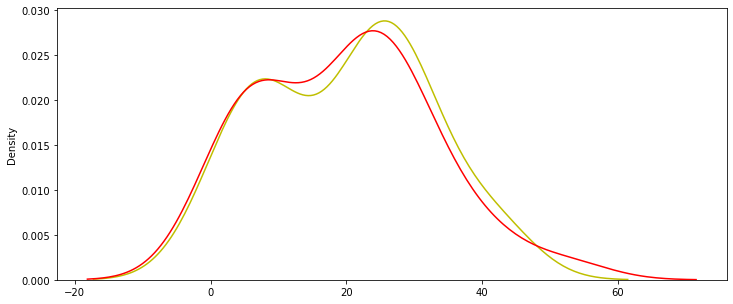

In [34]:
fig = plt.figure(figsize=(12, 5))

ax1 = sns.distplot(lr.predict(x_test), hist=False, color='y', label='Predicted Data')
ax2 = sns.distplot(y_test, hist=False,color='r', label='Actual Data', ax=ax1)